In [3]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("CollegeBasketballPlayers2009-2021.csv", sep=",")

df = df.head(762)

x1 = df.GP
x2 = df.Min_per
x3 = df.Ortg
x4 = df.usg
x5 = df.eFG
x6 = df.TS_per
x7 = df.ORB_per
x8 = df.stops
y =  df.pts

d = pd.DataFrame({'GP': x1, 'Min_per' : x2, 'Ortg' : x3,'Usage': x4, 
                  'eFG' : x5, 'TS_per' : x6,'ORB_per' : x7,'Stops' : x8, 'pts' : y })
d = d.head(762)

S:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
d.describe()

,GP,Min_per,Ortg,Usage,eFG,TS_per,ORB_per,Stops,pts
count,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000
mean,25.906824,45.761155,95.229265,18.725984,46.552231,49.895551,5.944751,102.421394,6.938586
std,8.721293,27.214129,22.400932,5.718022,14.586158,13.870970,4.741042,65.884007,5.276197
min,1.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.084114,0.000000
25%,23.000000,22.625000,89.200000,15.200000,43.325000,46.600000,2.300000,47.254675,2.414125
50%,29.000000,49.100000,98.800000,18.300000,48.500000,51.665000,5.200000,104.951500,6.038700
75%,31.000000,68.675000,107.000000,22.400000,52.700000,56.040000,8.900000,151.247000,10.536300
max,38.000000,93.700000,264.600000,45.800000,150.000000,150.000000,51.000000,275.974000,27.733300


In [5]:
d.corr()

,GP,Min_per,Ortg,Usage,eFG,TS_per,ORB_per,Stops,pts
GP,1.000000,0.744803,0.507896,0.098494,0.374844,0.365548,0.055876,0.751970,0.520776
Min_per,0.744803,1.000000,0.478515,0.385775,0.331900,0.359948,-0.050438,0.942149,0.860943
Ortg,0.507896,0.478515,1.000000,0.157482,0.667722,0.792459,0.126306,0.485682,0.476490
Usage,0.098494,0.385775,0.157482,1.000000,0.199973,0.240782,0.152848,0.398141,0.638628
eFG,0.374844,0.331900,0.667722,0.199973,1.000000,0.916080,0.048791,0.339746,0.332000
TS_per,0.365548,0.359948,0.792459,0.240782,0.916080,1.000000,0.029724,0.364372,0.373276
ORB_per,0.055876,-0.050438,0.126306,0.152848,0.048791,0.029724,1.000000,0.069013,-0.011119
Stops,0.751970,0.942149,0.485682,0.398141,0.339746,0.364372,0.069013,1.000000,0.844674
pts,0.520776,0.860943,0.476490,0.638628,0.332000,0.373276,-0.011119,0.844674,1.000000


<AxesSubplot:>

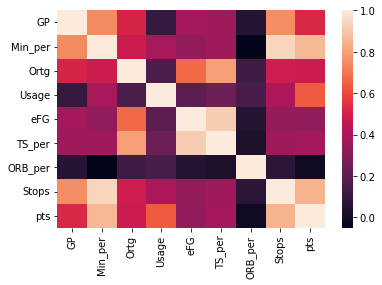

In [6]:
sns.heatmap(d.corr())

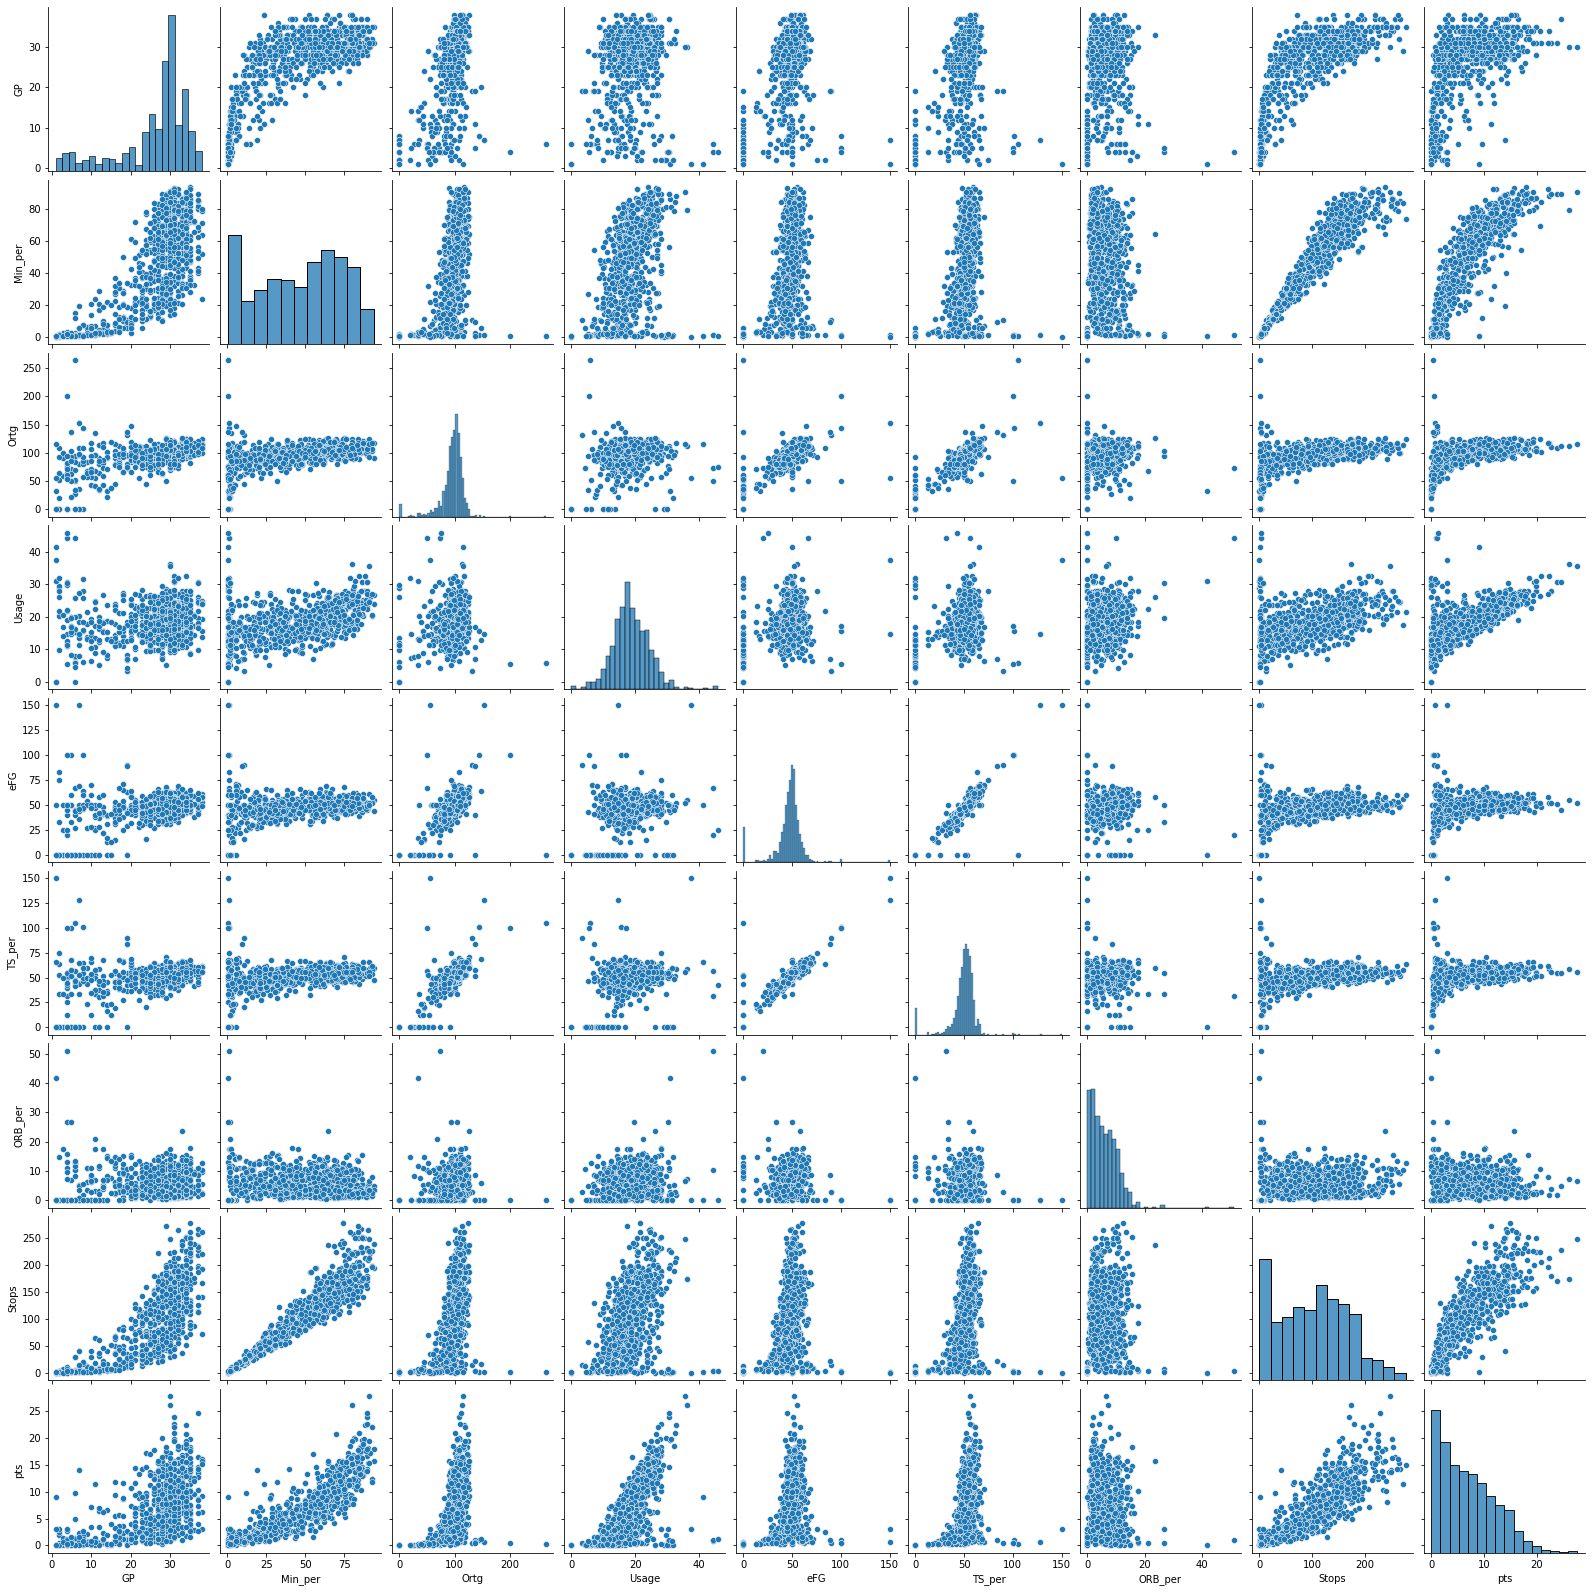

In [7]:
sns.pairplot(d)

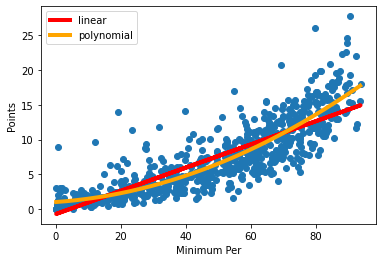

In [8]:
plt.scatter(x2,y)

x2 = x2.values.reshape(-1,1)
y = y.values.reshape(-1,1)

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x2,y)

#predict
y_head = lr.predict(x2)

plt.plot(x2,y_head,color="red",linewidth=4, label="linear")

# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

polynomial_regression = PolynomialFeatures(degree = 2)
x_polynomial = polynomial_regression.fit_transform(x2)
polynomial_regression.fit(x_polynomial,y)

linear_regression2 = LinearRegression()
linear_regression2.fit(x_polynomial, y)

x_grid = np.arange(min(x2), max(x2), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))

y_head2 = linear_regression2.predict(polynomial_regression.fit_transform(x_grid))

plt.plot(x_grid,y_head2,color="orange",linewidth=4, label="polynomial")
plt.xlabel("Minimum Per")
plt.ylabel("Points")
plt.legend()
plt.show()

In [9]:
print("intercept : ",linear_regression2.intercept_)
print("coef(eğim) : ",linear_regression2.coef_)
print("predict : ", lr.predict([[72]]))
print("r^2 : ",lr.score(x2,y))

intercept :  [1.0263237]
coef(eğim) :  [[0.         0.03253405 0.00156101]]
predict :  [[11.3183005]]
r^2 :  0.7412233033479845


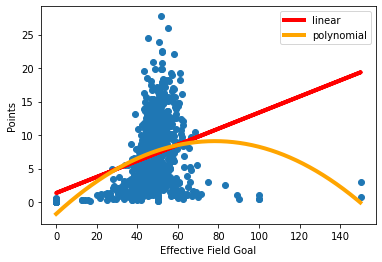

In [10]:
plt.scatter(x5,y)

x5 = x5.values.reshape(-1,1)

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x5,y)

#predict
y_head = lr.predict(x5)

plt.plot(x5,y_head,color="red",linewidth=4, label="linear")

# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

polynomial_regression = PolynomialFeatures(degree = 2)
x_polynomial = polynomial_regression.fit_transform(x5)
polynomial_regression.fit(x_polynomial,y)

linear_regression2 = LinearRegression()
linear_regression2.fit(x_polynomial, y)

x_grid = np.arange(min(x5), max(x5), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))

y_head2 = linear_regression2.predict(polynomial_regression.fit_transform(x_grid))

plt.plot(x_grid,y_head2,color="orange",linewidth=4, label="polynomial")
plt.legend()
plt.xlabel("Effective Field Goal")
plt.ylabel("Points")
plt.show()

In [11]:
print("intercept",linear_regression2.intercept_)
print("coef(eğim)",linear_regression2.coef_)
print("r^2 : ",lr.score(x2,y))

intercept [-1.77319707]
coef(eğim) [[ 0.          0.27808849 -0.00177924]]
r^2 :  0.6825699040987444
